In [1]:
%matplotlib inline
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

style = "<style>svg{width:50% !important;height:50% !important;}</style>"

In [2]:
info_2019 = pd.read_excel('C:\\Users\\Виталий\\Desktop\\8 семестр\\ВКР\\Python_VKR\\2019.xlsx')
info_2020 = pd.read_excel('C:\\Users\\Виталий\\Desktop\\8 семестр\\ВКР\\Python_VKR\\2020.xlsx')
info_2020_norm = pd.read_excel('C:\\Users\\Виталий\\Desktop\\8 семестр\\ВКР\\Python_VKR\\2020_нормир.xlsx')
info_2020_bins = pd.read_excel('C:\\Users\\Виталий\\Desktop\\8 семестр\\ВКР\\Python_VKR\\2020_бинирование.xlsx')

In [3]:
info_basis = info_2020[['BANK_NAME', 'BANK_ID']]
info_2019_clear = info_2019.drop(['BANK_NAME', 'BANK_ID'],axis=1)
info_2020_clear = info_2020.drop(['BANK_NAME', 'BANK_ID'],axis=1)
info_2020_norm_clear = info_2020_norm.drop(['BANK_NAME', 'BANK_ID'],axis=1)
info_2020_bins_clear = info_2020_bins.drop(['BANK_NAME', 'BANK_ID'],axis=1)

In [4]:
info_2019_array = info_2019_clear.values
info_2020_array = info_2020_clear.values
info_2020_norm_array = info_2020_norm_clear.values
info_2020_bins_array = info_2020_bins_clear.values

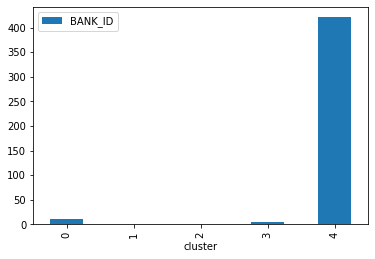

In [5]:
model_2020_cl_5 = KMeans(n_clusters=5)
model_2020_cl_5.fit(info_2020_array)
all_predictions_2020_cl_5 = model_2020_cl_5.predict(info_2020_array)
all_predictions_2020_cl_5 = pd.DataFrame(all_predictions_2020_cl_5, columns=['cluster'])
info_2020_cl_5_result = info_basis
info_2020_cl_5_result = info_2020_cl_5_result.join(all_predictions_2020_cl_5)
info_2020_cl_5_groupby = info_2020_cl_5_result.groupby('cluster',as_index = False) \
                                              .aggregate({'BANK_ID' : 'count'}) \
                                              .sort_values('cluster', ascending=True)  
info_2020_cl_5_groupby.plot(kind='bar',x='cluster',y='BANK_ID')

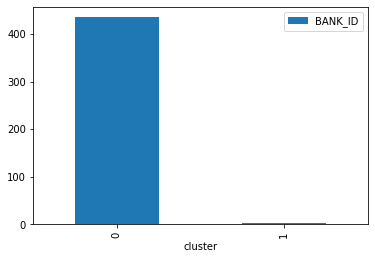

In [6]:
model_2020_cl_2 = KMeans(n_clusters=2)
model_2020_cl_2.fit(info_2020_array)
all_predictions_2020_cl_2 = model_2020_cl_2.predict(info_2020_array)
all_predictions_2020_cl_2 = pd.DataFrame(all_predictions_2020_cl_2, columns=['cluster'])
info_2020_cl_2_result = info_basis
info_2020_cl_2_result = info_2020_cl_2_result.join(all_predictions_2020_cl_2)
info_2020_cl_2_groupby = info_2020_cl_2_result.groupby('cluster',as_index = False) \
                                              .aggregate({'BANK_ID' : 'count'}) \
                                              .sort_values('cluster', ascending=True)  
info_2020_cl_2_groupby.plot(kind='bar',x='cluster',y='BANK_ID')

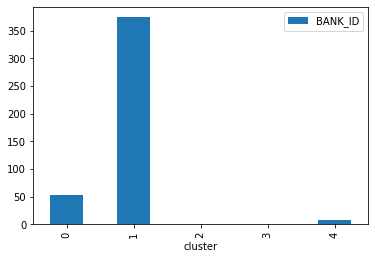

In [7]:
model_2020_norm_cl_5 = KMeans(n_clusters=5)
model_2020_norm_cl_5.fit(info_2020_norm_array)
all_predictions_2020_norm_cl_5 = model_2020_norm_cl_5.predict(info_2020_norm_array)
all_predictions_2020_norm_cl_5 = pd.DataFrame(all_predictions_2020_norm_cl_5, columns=['cluster'])
info_2020_norm_cl_5_result = info_basis
info_2020_norm_cl_5_result = info_2020_norm_cl_5_result.join(all_predictions_2020_norm_cl_5)
info_2020_norm_cl_5_groupby = info_2020_norm_cl_5_result.groupby('cluster',as_index = False) \
                                                        .aggregate({'BANK_ID' : 'count'})    \
                                                        .sort_values('cluster', ascending=True)  
info_2020_norm_cl_5_groupby.plot(kind='bar',x='cluster',y='BANK_ID')

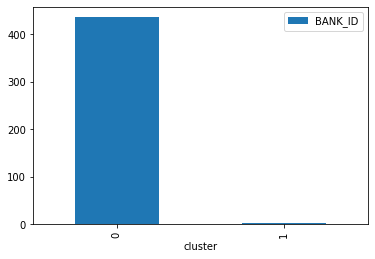

In [8]:
model_2020_norm_cl_2 = KMeans(n_clusters=2)
model_2020_norm_cl_2.fit(info_2020_norm_array)
all_predictions_2020_norm_cl_2 = model_2020_norm_cl_2.predict(info_2020_norm_array)
all_predictions_2020_norm_cl_2 = pd.DataFrame(all_predictions_2020_norm_cl_2, columns=['cluster'])
info_2020_norm_cl_2_result = info_basis
info_2020_norm_cl_2_result = info_2020_norm_cl_2_result.join(all_predictions_2020_norm_cl_2)
info_2020_norm_cl_2_groupby = info_2020_norm_cl_2_result.groupby('cluster',as_index = False) \
                                                        .aggregate({'BANK_ID' : 'count'})    \
                                                        .sort_values('cluster', ascending=True)  
info_2020_norm_cl_2_groupby.plot(kind='bar',x='cluster',y='BANK_ID')

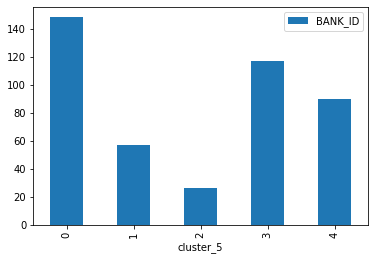

In [9]:
model_2020_bins_cl_5 = KMeans(n_clusters=5)
model_2020_bins_cl_5.fit(info_2020_bins_array)
all_predictions_2020_bins_cl_5 = model_2020_bins_cl_5.predict(info_2020_bins_array)
all_predictions_2020_bins_cl_5 = pd.DataFrame(all_predictions_2020_bins_cl_5, columns=['cluster_5'])
info_2020_bins_cl_5_result = info_basis
info_2020_bins_cl_5_result = info_2020_bins_cl_5_result.join(all_predictions_2020_bins_cl_5)
info_2020_bins_cl_5_groupby = info_2020_bins_cl_5_result.groupby('cluster_5',as_index = False) \
                                                        .aggregate({'BANK_ID' : 'count'})    \
                                                        .sort_values('cluster_5', ascending=True)  
info_2020_bins_cl_5_groupby.plot(kind='bar',x='cluster_5',y='BANK_ID')

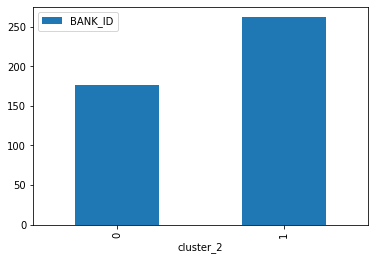

In [10]:
model_2020_bins_cl_2 = KMeans(n_clusters=2)
model_2020_bins_cl_2.fit(info_2020_bins_array)
all_predictions_2020_bins_cl_2 = model_2020_bins_cl_2.predict(info_2020_bins_array)
all_predictions_2020_bins_cl_2 = pd.DataFrame(all_predictions_2020_bins_cl_2, columns=['cluster_2'])
info_2020_bins_cl_2_result = info_basis
info_2020_bins_cl_2_result = info_2020_bins_cl_2_result.join(all_predictions_2020_bins_cl_2)
info_2020_bins_cl_2_groupby = info_2020_bins_cl_2_result.groupby('cluster_2',as_index = False) \
                                                        .aggregate({'BANK_ID' : 'count'})    \
                                                        .sort_values('cluster_2', ascending=True)  
info_2020_bins_cl_2_groupby.plot(kind='bar',x='cluster_2',y='BANK_ID')

In [11]:
bins_clusters = info_2020_bins_cl_5_result.merge(info_2020_bins_cl_2_result)
cl_2_highest = bins_clusters.iloc[0]['cluster_2']
cl_5_highest = bins_clusters.iloc[0]['cluster_5']
cl_5_high    = bins_clusters.iloc[8]['cluster_5']
cl_5_middle  = bins_clusters.iloc[3]['cluster_5']
cl_5_low     = bins_clusters.iloc[44]['cluster_5']

In [12]:
bins_clusters = bins_clusters.assign(CL_2_final   = np.where(bins_clusters.pipe(lambda x: x['cluster_2'] == cl_2_highest  ), 1, 0),
                                     CL_5_one     = np.where(bins_clusters.pipe(lambda x: x['cluster_5'] == cl_5_highest  ), 1, 0),
                                     CL_5_two     = np.where(bins_clusters.pipe(lambda x: x['cluster_5'] == cl_5_high     ), 1, 0),
                                     CL_5_three   = np.where(bins_clusters.pipe(lambda x: x['cluster_5'] == cl_5_middle   ), 1, 0),
                                     CL_5_four    = np.where(bins_clusters.pipe(lambda x: x['cluster_5'] == cl_5_low      ), 1, 0))

bins_clusters = bins_clusters.assign(CL_5_one_final   = bins_clusters.CL_5_one,
                                     CL_5_two_final   = bins_clusters.CL_5_one + bins_clusters.CL_5_two,
                                     CL_5_three_final = bins_clusters.CL_5_one + bins_clusters.CL_5_two + bins_clusters.CL_5_three,
                                     CL_5_four_final  = bins_clusters.CL_5_one + bins_clusters.CL_5_two + bins_clusters.CL_5_three + bins_clusters.CL_5_four)

bins_clusters = bins_clusters.drop(['cluster_2', 'CL_5_one', 'CL_5_two', 'CL_5_three', 'CL_5_four'],axis=1)
bins_clusters = info_2020_bins.merge(bins_clusters)

In [13]:
info_2020_bins

,BANK_NAME,BANK_ID,Net_Assets,Highly_liquid_assets,Cash_on_hand,Cash_on_hand_turnover,NOSTRO_accounts,FL_loans,FL_loans_for_up_to_180_days,FL_loans_for_a_period_of_181_days_to_1_year,...,Net_asset_return,Return_on_equity,Loan_portfolio_overdue_rate,Loan_Portfolio_Reservation_Level,The_level_of_collateral_for_the_loan_portfolio_with_a_pledge_of_property,Foreign_exchange_turnover_to_net_assets,Turnover_on_foreign_exchange_transactions_in_thousand_rubles,N1,N2,N3
0,Сбербанк России,1,1,1,1,1,1,1,1,1,...,2,1,3,5,2,2,1,3,1,2
1,ВТБ,2,1,1,1,1,1,1,2,1,...,2,2,3,5,3,2,1,3,1,2
2,Газпромбанк,3,1,1,1,1,1,1,3,1,...,3,2,3,4,3,2,1,3,1,2
3,Национальный Клиринговый Центр,4,1,1,2,6,1,6,6,6,...,4,1,4,6,4,6,7,4,3,5
4,Альфа-Банк,5,1,1,1,1,1,1,1,1,...,2,2,2,4,3,2,1,3,1,2
5,Россельхозбанк,6,1,1,1,1,1,1,4,1,...,4,4,2,5,3,3,1,3,1,2
6,Банк «ФК Открытие»,7,1,1,1,1,2,1,6,4,...,2,2,1,1,3,2,1,3,1,3
7,Московский кредитный банк,8,1,1,2,2,1,2,4,1,...,2,2,3,5,3,2,1,2,1,2
8,Национальный Банк «Траст»,9,1,3,4,6,2,3,5,6,...,2,4,1,1,3,2,1,4,2,3
9,Райффайзенбанк,10,1,1,1,1,2,1,1,2,...,2,1,3,5,3,1,1,3,1,2


In [14]:
x_cl_2       = bins_clusters.drop(['BANK_NAME', 'BANK_ID', 'CL_2_final', 'cluster_5', 'CL_5_one_final', 'CL_5_two_final', 'CL_5_three_final', 'CL_5_four_final'], axis=1)
y_cl_2       = bins_clusters.CL_2_final

x_cl_5       = bins_clusters.drop(['BANK_NAME', 'BANK_ID', 'CL_2_final', 'cluster_5', 'CL_5_one_final', 'CL_5_two_final', 'CL_5_three_final', 'CL_5_four_final'], axis=1)
y_cl_5       = bins_clusters.cluster_5

x_cl_5_one   = bins_clusters.drop(['BANK_NAME', 'BANK_ID', 'CL_2_final', 'cluster_5', 'CL_5_one_final', 'CL_5_two_final', 'CL_5_three_final', 'CL_5_four_final'], axis=1)
y_cl_5_one   = bins_clusters.CL_5_one_final

x_cl_5_two   = bins_clusters.drop(['BANK_NAME', 'BANK_ID', 'CL_2_final', 'cluster_5', 'CL_5_one_final', 'CL_5_two_final', 'CL_5_three_final', 'CL_5_four_final'], axis=1)
y_cl_5_two   = bins_clusters.CL_5_two_final

x_cl_5_three = bins_clusters.drop(['BANK_NAME', 'BANK_ID', 'CL_2_final', 'cluster_5', 'CL_5_one_final', 'CL_5_two_final', 'CL_5_three_final', 'CL_5_four_final'], axis=1)
y_cl_5_three = bins_clusters.CL_5_three_final

x_cl_5_four = bins_clusters.drop(['BANK_NAME', 'BANK_ID', 'CL_2_final', 'cluster_5', 'CL_5_one_final', 'CL_5_two_final', 'CL_5_three_final', 'CL_5_four_final'], axis=1)
y_cl_5_four = bins_clusters.CL_5_four_final

In [40]:
parametrs = {'n_estimators': range(1,51), 
             'max_depth':range(1,21),
             'min_samples_leaf':range(1,11),
             'min_samples_split':range(2,11)}
scores_data = pd.DataFrame()
features_data = pd.DataFrame()

In [43]:
# классификация
i = 0
while i < 100:
    i = i + 1
    
    # 2 кластера
    
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_cl_2, y_cl_2, test_size=0.3)
    clf_2 = RandomForestClassifier()
    rndm_search_cv_clf_2 = RandomizedSearchCV(clf_2, parametrs, cv=5, iid=True)
    rndm_search_cv_clf_2.fit(x_train_2,y_train_2)
    best_clf_2 = rndm_search_cv_clf_2.best_estimator_
    feature_importances_2 = best_clf_2.feature_importances_

    temp_score_data = pd.DataFrame({'name' : ['clf_2'], 
                                    'score': [best_clf_2.score(x_test_2,y_test_2)]})
    
    temp_feature_importances_df_2 = pd.DataFrame({'features': list(x_train_2),
                                                  'feature_importances': feature_importances_2})
    temp_feature_importances_df_2['name'] = 'clf_2'
    
    scores_data   = scores_data.append(temp_score_data, sort=False)
    features_data = features_data.append(temp_feature_importances_df_2, sort=False)
    
    # 5 кластеров
    
    x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x_cl_5, y_cl_5, test_size=0.3)
    clf_5 = RandomForestClassifier()
    rndm_search_cv_clf_5 = RandomizedSearchCV(clf_5, parametrs, cv=5, iid=True)
    rndm_search_cv_clf_5.fit(x_train_5,y_train_5)
    best_clf_5 = rndm_search_cv_clf_5.best_estimator_
    feature_importances_5 = best_clf_5.feature_importances_

    temp_score_data = pd.DataFrame({'name' : ['clf_5'], 
                                    'score': [best_clf_5.score(x_test_5,y_test_5)]})
    
    temp_feature_importances_df_5 = pd.DataFrame({'features': list(x_train_5),
                                                  'feature_importances': feature_importances_5})
    temp_feature_importances_df_5['name'] = 'clf_5'
    
    scores_data   = scores_data.append(temp_score_data, sort=False)
    features_data = features_data.append(temp_feature_importances_df_5, sort=False)
    
    # 5 кластеров 1 целевой
    
    x_train_5_one, x_test_5_one, y_train_5_one, y_test_5_one = train_test_split(x_cl_5_one, y_cl_5_one, test_size=0.3)
    clf_5_one = RandomForestClassifier()
    rndm_search_cv_clf_5_one = RandomizedSearchCV(clf_5_one, parametrs, cv=5, iid=True)
    rndm_search_cv_clf_5_one.fit(x_train_5_one,y_train_5_one)
    best_clf_5_one = rndm_search_cv_clf_5_one.best_estimator_
    feature_importances_5_one = best_clf_5_one.feature_importances_
    
    temp_score_data = pd.DataFrame({'name' : ['clf_5_one'], 
                                    'score': [best_clf_5_one.score(x_test_5_one,y_test_5_one)]})
    
    temp_feature_importances_df_5_one = pd.DataFrame({'features': list(x_train_5_one),
                                                      'feature_importances': feature_importances_5_one})
    temp_feature_importances_df_5_one['name'] = 'clf_5_one'
    
    scores_data = scores_data.append(temp_score_data, sort=False)
    features_data = features_data.append(temp_feature_importances_df_5_one, sort=False)
    
    # 5 кластеров 2 целевых
    
    x_train_5_two, x_test_5_two, y_train_5_two, y_test_5_two = train_test_split(x_cl_5_two, y_cl_5_two, test_size=0.3)
    clf_5_two = RandomForestClassifier()
    rndm_search_cv_clf_5_two = RandomizedSearchCV(clf_5_two, parametrs, cv=5, iid=True)
    rndm_search_cv_clf_5_two.fit(x_train_5_two,y_train_5_two)
    best_clf_5_two = rndm_search_cv_clf_5_two.best_estimator_
    feature_importances_5_two = best_clf_5_two.feature_importances_
    
    temp_score_data = pd.DataFrame({'name' : ['clf_5_two'], 
                                    'score': [best_clf_5_two.score(x_test_5_two,y_test_5_two)]})
    
    temp_feature_importances_df_5_two = pd.DataFrame({'features': list(x_train_5_two),
                                                      'feature_importances': feature_importances_5_two})
    temp_feature_importances_df_5_two['name'] = 'clf_5_two'
    
    scores_data = scores_data.append(temp_score_data, sort=False)
    features_data = features_data.append(temp_feature_importances_df_5_two, sort=False)
    
    # 5 кластеров 3 целевых
    
    x_train_5_three, x_test_5_three, y_train_5_three, y_test_5_three = train_test_split(x_cl_5_three, y_cl_5_three, test_size=0.3)
    clf_5_three = RandomForestClassifier()
    rndm_search_cv_clf_5_three = RandomizedSearchCV(clf_5_three, parametrs, cv=5, iid=True)
    rndm_search_cv_clf_5_three.fit(x_train_5_three,y_train_5_three)
    best_clf_5_three = rndm_search_cv_clf_5_three.best_estimator_
    feature_importances_5_three = best_clf_5_three.feature_importances_
    
    temp_score_data = pd.DataFrame({'name' : ['clf_5_three'], 
                                    'score': [best_clf_5_three.score(x_test_5_three,y_test_5_three)]})
    
    temp_feature_importances_df_5_three = pd.DataFrame({'features': list(x_train_5_three),
                                                        'feature_importances': feature_importances_5_three})
    temp_feature_importances_df_5_three['name'] = 'clf_5_three'
    
    scores_data = scores_data.append(temp_score_data, sort=False)
    features_data = features_data.append(temp_feature_importances_df_5_three, sort=False)
    
    # 5 кластеров 4 целевых
    
    x_train_5_four, x_test_5_four, y_train_5_four, y_test_5_four = train_test_split(x_cl_5_four, y_cl_5_four, test_size=0.3)
    clf_5_four = RandomForestClassifier()
    rndm_search_cv_clf_5_four = RandomizedSearchCV(clf_5_four, parametrs, cv=5, iid=True)
    rndm_search_cv_clf_5_four.fit(x_train_5_four,y_train_5_four)
    best_clf_5_four = rndm_search_cv_clf_5_four.best_estimator_
    feature_importances_5_four = best_clf_5_four.feature_importances_
    
    temp_score_data = pd.DataFrame({'name' : ['clf_5_four'], 
                                    'score': [best_clf_5_four.score(x_test_5_four,y_test_5_four)]})
    
    temp_feature_importances_df_5_four = pd.DataFrame({'features': list(x_train_5_four),
                                                        'feature_importances': feature_importances_5_four})
    temp_feature_importances_df_5_four['name'] = 'clf_5_four'
    
    scores_data = scores_data.append(temp_score_data, sort=False)
    features_data = features_data.append(temp_feature_importances_df_5_four, sort=False)    
    
    print(str(i) + ' шаг выполнен')
    
    

1 шаг выполнен


In [44]:
scores_data.groupby('name',as_index = False) \
           .aggregate({'score' : 'mean'}) \
           .sort_values('score', ascending=False)

,name,score
5,clf_5_two,0.977273
3,clf_5_one,0.973485
2,clf_5_four,0.969697
0,clf_2,0.954545
4,clf_5_three,0.954545
1,clf_5,0.920455


In [45]:
# общее по всем моделям

features_data.groupby('features',as_index = False) \
             .aggregate({'feature_importances' : 'mean'}) \
             .sort_values('feature_importances', ascending=False) \
             .head()

,features,feature_importances
52,Legal_entity_funds_turnover,0.068392
10,Deposits_FL,0.067092
11,Deposits_FL_turnover,0.060341
50,Legal_entity_accounts_turnover,0.056759
16,FL_accounts_for_a_period_of_1_to_3_years,0.050684


In [19]:
# 2 кластера

features_data.query('name == "clf_2"') \
             .groupby('features',as_index = False) \
             .aggregate({'feature_importances' : 'mean'}) \
             .sort_values('feature_importances', ascending=False) \
             .head()

,features,feature_importances
10,Deposits_FL,0.104091
16,FL_accounts_for_a_period_of_1_to_3_years,0.090988
50,Legal_entity_accounts_turnover,0.078878
11,Deposits_FL_turnover,0.065836
52,Legal_entity_funds_turnover,0.057460


In [20]:
# 5 кластеров

features_data.query('name == "clf_5"') \
             .groupby('features',as_index = False) \
             .aggregate({'feature_importances' : 'mean'}) \
             .sort_values('feature_importances', ascending=False) \
             .head()

,features,feature_importances
10,Deposits_FL,0.083061
50,Legal_entity_accounts_turnover,0.074819
52,Legal_entity_funds_turnover,0.071892
11,Deposits_FL_turnover,0.067226
64,Net_Assets,0.043219


In [21]:
# 5 кластеров one

features_data.query('name == "clf_5_one"') \
             .groupby('features',as_index = False) \
             .aggregate({'feature_importances' : 'mean'}) \
             .sort_values('feature_importances', ascending=False) \
             .head()

,features,feature_importances
11,Deposits_FL_turnover,0.093579
10,Deposits_FL,0.056017
50,Legal_entity_accounts_turnover,0.049073
24,FL_accounts_turnover,0.046880
28,FL_loans_for_more_than_3_years,0.045103


In [22]:
# 5 кластеров two

features_data.query('name == "clf_5_two"') \
             .groupby('features',as_index = False) \
             .aggregate({'feature_importances' : 'mean'}) \
             .sort_values('feature_importances', ascending=False) \
             .head()

,features,feature_importances
10,Deposits_FL,0.106460
16,FL_accounts_for_a_period_of_1_to_3_years,0.077935
11,Deposits_FL_turnover,0.076014
52,Legal_entity_funds_turnover,0.058491
68,Overdrafts_and_other_funds_FL,0.055153


In [23]:
# 5 кластеров three

features_data.query('name == "clf_5_three"') \
             .groupby('features',as_index = False) \
             .aggregate({'feature_importances' : 'mean'}) \
             .sort_values('feature_importances', ascending=False) \
             .head()

,features,feature_importances
50,Legal_entity_accounts_turnover,0.107408
52,Legal_entity_funds_turnover,0.101783
64,Net_Assets,0.075871
53,Legal_entity_loans,0.069011
10,Deposits_FL,0.065102


In [24]:
# 5 кластеров four

features_data.query('name == "clf_5_four"') \
             .groupby('features',as_index = False) \
             .aggregate({'feature_importances' : 'mean'}) \
             .sort_values('feature_importances', ascending=False) \
             .head()

,features,feature_importances
52,Legal_entity_funds_turnover,0.104503
50,Legal_entity_accounts_turnover,0.088171
11,Deposits_FL_turnover,0.082024
10,Deposits_FL,0.063758
37,Issued_MBK_total_turnover,0.058932


In [65]:
model_cl_5_two = bins_clusters.drop(['BANK_NAME', 'BANK_ID', 'CL_2_final', 'cluster_5', 'CL_5_one_final', 'CL_5_two_final', 'CL_5_three_final', 'CL_5_four_final'], axis=1)
model_cl_5_two['EVENT'] = bins_clusters.CL_5_two_final
model_cl_5_two['HELP']  = 1

In [70]:
# Information Value

Information_Value = pd.DataFrame()

column_list = list(model_cl_5_two)
j = -1

for col_name in column_list:
    
    j = j + 1
    
    if (col_name == 'EVENT' or col_name == 'HELP'):
        break
        
    attr_bins = model_cl_5_two.groupby(col_name,as_index = False) \
                              .aggregate({'HELP' : 'count', 
                                          'EVENT' : 'sum'}) \
                              .rename(columns = {col_name : col_name,
                                                 'HELP':'ALL_OBS',
                                                 'EVENT':'GOOD_OBS'}) \
                              .sort_values(col_name, ascending=True)
    
    attr_bins = attr_bins.assign(BAD_OBS = attr_bins.ALL_OBS - attr_bins.GOOD_OBS,
                                 del_flag = 0)
    
    
    # склеивание бинов
    
    this_bin  = -1
    this_all  = -1
    this_good = -1
    this_bad  = -1
    last_bin  = -1
    last_all  = -1
    last_good = -1
    last_bad  = -1
    
    i = -1
    
    for index, row in attr_bins.iterrows():
        
        i = i + 1
              
        if this_all != -1:
            
            last_bin  = this_bin
            last_all  = this_all
            last_good = this_good
            last_bad  = this_bad
        
        this_bin  = row[col_name]
        this_all  = row['ALL_OBS']
        this_good = row['GOOD_OBS']
        this_bad  = row['BAD_OBS']               
        
        if this_bin != 1 and ((this_good == 0 or this_bad == 0) or (last_good == 0 or last_bad == 0)): 
            
            attr_bins.loc[i,'del_flag'] = 1
            attr_bins.loc[i-1,'del_flag'] = 1
            
            was_bin   = this_bin
            this_bin  = (this_bin + last_bin)/2
            this_all  = this_all + last_all
            this_good = this_good + last_good
            this_bad  = this_bad + last_bad

            attr_bins = attr_bins.append(pd.DataFrame([[this_bin, 
                                                        this_all,
                                                        this_good,
                                                        this_bad,
                                                        0]], 
                                                        columns=[col_name, 'ALL_OBS', 'GOOD_OBS', 'BAD_OBS', 'del_flag']),
                                         ignore_index=True, sort = False)                       

    attr_bins = attr_bins.query('del_flag == 0')                     
    attr_bins = attr_bins.query('GOOD_OBS != 0')          
    attr_bins = attr_bins.query('BAD_OBS != 0') 
    
    if col_name == 'Cash_on_hand':
        attr_bins = attr_bins.query("Cash_on_hand != 4.5")
        
    if col_name == 'Deposits_FL':
        attr_bins = attr_bins.query("Deposits_FL != 8")
        
    attr_bins = attr_bins.sort_values(col_name, ascending=True)
            
    SUM_GOOD_OBS = attr_bins.GOOD_OBS.sum()
    SUM_BAD_OBS = attr_bins.BAD_OBS.sum()
    
    attr_bins = attr_bins.assign(GOOD_PRCNT = attr_bins.GOOD_OBS/SUM_GOOD_OBS,
                                 BAD_PRCNT  = attr_bins.BAD_OBS/SUM_BAD_OBS)
    
    
    attr_bins = attr_bins.assign(WOE = np.log(attr_bins.GOOD_PRCNT/attr_bins.BAD_PRCNT))
    attr_bins = attr_bins.assign(IV  = (attr_bins.GOOD_PRCNT - attr_bins.BAD_PRCNT) * attr_bins.WOE)
    
    print(attr_bins)
    
    SUM_IV = attr_bins.IV.sum()

    temp_IV = pd.DataFrame({'index' : [j],
                            'name': [col_name],
                            'IV': [SUM_IV]})
    
    Information_Value = Information_Value.append(temp_IV, sort=False)
    
Information_Value = Information_Value.set_index('index').reset_index(drop=True)

   Net_Assets  ALL_OBS  GOOD_OBS  BAD_OBS  del_flag  GOOD_PRCNT  BAD_PRCNT  \
0         1.0       14        13        1         0    0.074713   0.003788   
1         2.0       84        64       20         0    0.367816   0.075758   
2         3.0      135        89       46         0    0.511494   0.174242   
5         4.5      205         8      197         0    0.045977   0.746212   

        WOE        IV  
0  2.981843  0.211487  
1  1.580045  0.461465  
2  1.076889  0.363183  
5 -2.786868  1.951463  
   Highly_liquid_assets  ALL_OBS  GOOD_OBS  BAD_OBS  del_flag  GOOD_PRCNT  \
0                   1.0       13        12        1         0    0.068966   
1                   2.0       95        69       26         0    0.396552   
2                   3.0      166        89       77         0    0.511494   
5                   4.5      164         4      160         0    0.022989   

   BAD_PRCNT       WOE        IV  
0   0.003788  2.901800  0.189133  
1   0.098485  1.392904  0.415178 

   Legal_entity_loans_for_more_than_3_years  ALL_OBS  GOOD_OBS  BAD_OBS  \
6                                       1.5       52        47        5   
2                                       3.0      106        78       28   
3                                       4.0      102        26       76   
4                                       5.0       53         9       44   
5                                       6.0      125        14      111   

   del_flag  GOOD_PRCNT  BAD_PRCNT       WOE        IV  
6         0    0.270115   0.018939  2.657603  0.667525  
2         0    0.448276   0.106061  1.441398  0.493268  
3         0    0.149425   0.287879 -0.655743  0.090790  
4         0    0.051724   0.166667 -1.170071  0.134491  
5         0    0.080460   0.420455 -1.653579  0.562208  
   Overdrafts_legal_entity  ALL_OBS  GOOD_OBS  BAD_OBS  del_flag  GOOD_PRCNT  \
0                        1       11        10        1         0    0.057471   
1                        2       60        53  

5      154         0    0.103448   0.583333 -1.729687  0.830051  
   FL_accounts_for_a_period_of_1_to_3_years  ALL_OBS  GOOD_OBS  BAD_OBS  \
6                                       1.5       88        87        1   
2                                       3.0       91        67       24   
3                                       4.0       83        13       70   
4                                       5.0       27         3       24   
5                                       6.0      149         4      145   

   del_flag  GOOD_PRCNT  BAD_PRCNT       WOE        IV  
6         0    0.500000   0.003788  4.882802  2.422905  
2         0    0.385057   0.090909  1.443533  0.424613  
3         0    0.074713   0.265152 -1.266652  0.241220  
4         0    0.017241   0.090909 -1.662548  0.122476  
5         0    0.022989   0.549242 -3.173546  1.670091  
   FL_accounts_for_a_period_of_1_to_3_years_turnover  ALL_OBS  GOOD_OBS  \
6                                                1.5       82     

4   0.837121 -0.574550  0.210203  
   Attracted_from_the_CBR  ALL_OBS  GOOD_OBS  BAD_OBS  del_flag  GOOD_PRCNT  \
4                     1.5       15        13        2         0    0.074713   
2                     3.0       24        23        1         0    0.132184   
3                     4.0      399       138      261         0    0.793103   

   BAD_PRCNT       WOE        IV  
4   0.007576  2.288696  0.153656  
2   0.003788  3.552388  0.456113  
3   0.988636 -0.220373  0.043090  
   Attracted_from_the_CBR_turnover  ALL_OBS  GOOD_OBS  BAD_OBS  del_flag  \
0                                1       10         8        2         0   
1                                2       17        12        5         0   
2                                3      411       154      257         0   

   GOOD_PRCNT  BAD_PRCNT       WOE        IV  
0    0.045977   0.007576  1.803188  0.069245  
1    0.068966   0.018939  1.292363  0.064652  
2    0.885057   0.973485 -0.095230  0.008421  
   Bonds_and_Bi

In [71]:
# P_Value

PVALUE_cl_5_two = model_cl_5_two.drop(['EVENT', 'HELP'], axis=1).values
PVALUE_RESULT = stats.ttest_1samp(PVALUE_cl_5_two,5.0)
PVALUE_DF = pd.DataFrame(PVALUE_RESULT[1], columns=['P_VALUE'])
MODEL_RESULTS = Information_Value.join(PVALUE_DF)
MODEL_RESULTS = MODEL_RESULTS.query('IV > 0.1')
MODEL_RESULTS = MODEL_RESULTS.query('IV < 2.5')
MODEL_RESULTS = MODEL_RESULTS.query('P_VALUE < 0.005')

In [72]:
# Корреляция

cut_off = 0.5
data = model_cl_5_two.drop(['EVENT', 'HELP'], axis=1) #info_2020_clear  

MODEL_CORR = MODEL_RESULTS
MODEL_CORR['corr_del_flag'] = 0
MODEL_CORR = MODEL_CORR.sort_values('IV', ascending=True)
MODEL_CORR = MODEL_CORR.reset_index(drop=True)
list_var = MODEL_CORR.name.values

i = 0

while i <= len(list_var)-1:
    
    j = i + 1
    
    while j <= len(list_var)-1:  
        
        #print(i,j,'--->',data[list_var[i]].corr(data[list_var[j]]))
    
        if abs(data[list_var[i]].corr(data[list_var[j]])) >= cut_off:
            MODEL_CORR.loc[i,'corr_del_flag'] = 1
            break
        
        j = j + 1
    
    i = i + 1
    
#MODEL_CORR = MODEL_CORR.query('corr_del_flag == 0')

In [76]:
MODEL_CORR.round(3)

,name,IV,P_VALUE,corr_del_flag
0,Attracted_from_the_CBR_turnover,0.142,0.0,1
1,Net_asset_return,0.215,0.0,1
2,LORO_accounts,0.244,0.0,1
3,Return_on_equity,0.278,0.0,1
4,Bonds_issued,0.350,0.0,1
5,Placed_interbank_loans_in_the_Central_Bank_of_...,0.365,0.0,1
6,Investments_in_bills,0.386,0.0,0
7,Placed_interbank_loans_in_the_Central_Bank_of_...,0.427,0.0,0
8,N3,0.441,0.0,0
9,The_level_of_collateral_for_the_loan_portfolio...,0.616,0.0,0


In [30]:
# регрессия

X_regr = model_cl_5_two[list(MODEL_CORR.name.values)]
Y_regr = y_cl_5_two

REGRESSION_DF = pd.DataFrame()

x_train_regr, x_test_regr, y_train_regr, y_test_regr = train_test_split(X_regr, Y_regr, test_size=0.3)

regr_1 = LinearRegression()
regr_2 = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
regr_3 = KNeighborsRegressor(n_neighbors=6)
regr_4 = SVR(kernel='linear')
regr_5 = LogisticRegression(solver = 'lbfgs')

regr_1.fit(x_train_regr, y_train_regr)
regr_2.fit(x_train_regr, y_train_regr)
regr_3.fit(x_train_regr, y_train_regr)
regr_4.fit(x_train_regr, y_train_regr)
regr_5.fit(x_train_regr, y_train_regr)

temp_regr_1 = pd.DataFrame({'name': ['LinearRegression'],
                          'train R^2': [regr_1.score(x_train_regr, y_train_regr)],
                          'test R^2' : [regr_1.score(x_test_regr, y_test_regr)]})

temp_regr_2 = pd.DataFrame({'name': ['RandomForestRegressor'],
                          'train R^2': [regr_2.score(x_train_regr, y_train_regr)],
                          'test R^2' : [regr_2.score(x_test_regr, y_test_regr)]})

temp_regr_3 = pd.DataFrame({'name': ['KNeighborsRegressor'],
                          'train R^2': [regr_3.score(x_train_regr, y_train_regr)],
                          'test R^2' : [regr_3.score(x_test_regr, y_test_regr)]})

temp_regr_4 = pd.DataFrame({'name': ['SVR'],
                          'train R^2': [regr_4.score(x_train_regr, y_train_regr)],
                          'test R^2' : [regr_4.score(x_test_regr, y_test_regr)]})

temp_regr_5 = pd.DataFrame({'name': ['LogisticRegression'],
                          'train R^2': [regr_5.score(x_train_regr, y_train_regr)],
                          'test R^2' : [regr_5.score(x_test_regr, y_test_regr)]})

REGRESSION_DF = REGRESSION_DF.append(temp_regr_1, sort=False)
REGRESSION_DF = REGRESSION_DF.append(temp_regr_2, sort=False)
REGRESSION_DF = REGRESSION_DF.append(temp_regr_3, sort=False)
REGRESSION_DF = REGRESSION_DF.append(temp_regr_4, sort=False)
REGRESSION_DF = REGRESSION_DF.append(temp_regr_5, sort=False) 

In [31]:
REGRESSION_DF

,name,train R^2,test R^2
0,LinearRegression,0.534946,0.442256
0,RandomForestRegressor,0.941239,0.549066
0,KNeighborsRegressor,0.683371,0.566869
0,SVR,0.522709,0.419075
0,LogisticRegression,0.856209,0.833333


In [32]:
print(regr_5.coef_)
print(regr_5.intercept_)

[[-0.18127533 -0.04844387 -0.48714732  0.13729457 -0.28263673 -0.09515806
  -1.11470137 -0.73958777 -0.90134474 -0.87642728]]
[16.11595358]


In [33]:
train_model = x_train_regr.join(y_train_regr)
test_model  = x_test_regr.join(y_test_regr)

In [34]:
train_model = train_model.assign(probability = 1/(1+np.exp(-(17.9155309
                                              - 1.17922102 * train_model.Investments_in_bills
                                              - 0.09825652 * train_model.Placed_interbank_loans_in_the_Central_Bank_of_the_Russian_Federation
                                              - 0.50128805 * train_model.N3
                                              - 0.0513765  * train_model.The_level_of_collateral_for_the_loan_portfolio_with_a_pledge_of_property
                                              - 0.60559687 * train_model.Attracted_from_the_CBR
                                              + 0.00449706 * train_model.Loan_Portfolio_Reservation_Level
                                              - 1.08087565 * train_model.Equity_Investments
                                              - 1.06288485 * train_model.NOSTRO_accounts              
                                              - 0.57204128 * train_model.FL_loans_for_a_period_of_181_days_to_1_year              
                                              + 1.24116396 * train_model.N1              
                                              - 0.83916374 * train_model.FL_accounts_for_a_period_of_91_to_180_days              
                                             ))))

test_model  = test_model.assign(probability = 1/(1+np.exp(-(17.9155309
                                              - 1.17922102 * test_model.Investments_in_bills
                                              - 0.09825652 * test_model.Placed_interbank_loans_in_the_Central_Bank_of_the_Russian_Federation
                                              - 0.50128805 * test_model.N3
                                              - 0.0513765  * test_model.The_level_of_collateral_for_the_loan_portfolio_with_a_pledge_of_property
                                              - 0.60559687 * test_model.Attracted_from_the_CBR
                                              + 0.00449706 * test_model.Loan_Portfolio_Reservation_Level
                                              - 1.08087565 * test_model.Equity_Investments
                                              - 1.06288485 * test_model.NOSTRO_accounts              
                                              - 0.57204128 * test_model.FL_loans_for_a_period_of_181_days_to_1_year              
                                              + 1.24116396 * test_model.N1              
                                              - 0.83916374 * test_model.FL_accounts_for_a_period_of_91_to_180_days              
                                             ))))                                           

AttributeError: 'DataFrame' object has no attribute 'N1'

In [ ]:
#train_model.to_excel('C:\\Users\\Виталий\\Desktop\\8 семестр\\ВКР\\Python_VKR\\train_model_3.xlsx')
#test_model.to_excel('C:\\Users\\Виталий\\Desktop\\8 семестр\\ВКР\\Python_VKR\\test_model_3.xlsx')

In [79]:
# перебинирование

X_regr_bin = model_cl_5_two[['Investments_in_bills', 
                             'Placed_interbank_loans_in_the_Central_Bank_of_the_Russian_Federation',
                             'N3',
                             'The_level_of_collateral_for_the_loan_portfolio_with_a_pledge_of_property',
                             'Attracted_from_the_CBR',
                             'Loan_Portfolio_Reservation_Level',
                             'Equity_Investments',
                             'NOSTRO_accounts',
                             'FL_loans_for_a_period_of_181_days_to_1_year',
                             'N1',
                             'FL_accounts_for_a_period_of_91_to_180_days'
                              ]].copy()
Y_regr_bin = y_cl_5_two

column_list = list(X_regr_bin)

for col_name in column_list:    
    i = -1    
    for index, row in X_regr_bin.iterrows():        
        i = i + 1 
        
        if col_name == 'Placed_interbank_loans_in_the_Central_Bank_of_the_Russian_Federation':        
            if X_regr_bin.loc[i,col_name] == 5:        
                X_regr_bin.loc[i,col_name] = 4
                
        if col_name == 'N3': 
            if X_regr_bin.loc[i,col_name] == 2: 
                X_regr_bin.loc[i,col_name] = 1       
            if X_regr_bin.loc[i,col_name] == 3: 
                X_regr_bin.loc[i,col_name] = 2
            if X_regr_bin.loc[i,col_name] == 4 or X_regr_bin.loc[i,col_name] == 5: 
                X_regr_bin.loc[i,col_name] = 3  
                
        if col_name == 'Attracted_from_the_CBR':
            if X_regr_bin.loc[i,col_name] == 2: 
                X_regr_bin.loc[i,col_name] = 1        
            if X_regr_bin.loc[i,col_name] == 3: 
                X_regr_bin.loc[i,col_name] = 2
            if X_regr_bin.loc[i,col_name] == 4: 
                X_regr_bin.loc[i,col_name] = 3
                
        if col_name == 'Loan_Portfolio_Reservation_Level':
            if X_regr_bin.loc[i,col_name] == 4: 
                X_regr_bin.loc[i,col_name] = 3        
            if X_regr_bin.loc[i,col_name] == 5: 
                X_regr_bin.loc[i,col_name] = 4
            if X_regr_bin.loc[i,col_name] == 6: 
                X_regr_bin.loc[i,col_name] = 5
        
        if col_name == 'Equity_Investments':
            if X_regr_bin.loc[i,col_name] == 2: 
                X_regr_bin.loc[i,col_name] = 1        
            if X_regr_bin.loc[i,col_name] == 3: 
                X_regr_bin.loc[i,col_name] = 2
            if X_regr_bin.loc[i,col_name] == 4: 
                X_regr_bin.loc[i,col_name] = 3
                
        if col_name == 'NOSTRO_accounts':
            if X_regr_bin.loc[i,col_name] == 2: 
                X_regr_bin.loc[i,col_name] = 1        
            if X_regr_bin.loc[i,col_name] == 3: 
                X_regr_bin.loc[i,col_name] = 2
            if X_regr_bin.loc[i,col_name] == 4 or X_regr_bin.loc[i,col_name] == 5 or X_regr_bin.loc[i,col_name] == 6: 
                X_regr_bin.loc[i,col_name] = 3
                
        if col_name == 'FL_loans_for_a_period_of_181_days_to_1_year':
            if X_regr_bin.loc[i,col_name] == 2: 
                X_regr_bin.loc[i,col_name] = 1        
            if X_regr_bin.loc[i,col_name] == 3 or X_regr_bin.loc[i,col_name] == 4 or X_regr_bin.loc[i,col_name] == 5: 
                X_regr_bin.loc[i,col_name] = 2
            if X_regr_bin.loc[i,col_name] == 6: 
                X_regr_bin.loc[i,col_name] = 3
                
        if col_name == 'FL_accounts_for_a_period_of_91_to_180_days':
            if X_regr_bin.loc[i,col_name] == 2 or X_regr_bin.loc[i,col_name] == 3: 
                X_regr_bin.loc[i,col_name] = 1        
            if X_regr_bin.loc[i,col_name] == 4: 
                X_regr_bin.loc[i,col_name] = 2
            if X_regr_bin.loc[i,col_name] == 5: 
                X_regr_bin.loc[i,col_name] = 3
            if X_regr_bin.loc[i,col_name] == 6: 
                X_regr_bin.loc[i,col_name] = 4
                
x_train_regr_bin, x_test_regr_bin, y_train_regr_bin, y_test_regr_bin = train_test_split(X_regr_bin, Y_regr_bin, test_size=0.3)

regr_bin = LogisticRegression(solver = 'lbfgs')
regr_bin.fit(x_train_regr_bin, y_train_regr_bin)
print(regr_bin.score(x_train_regr_bin, y_train_regr_bin), regr_bin.score(x_test_regr_bin, y_test_regr_bin))              


0.9019607843137255 0.8939393939393939


In [78]:
print(regr_bin.coef_)
print(regr_bin.intercept_)

[[-0.56083743 -0.15564474 -0.47242222 -0.03015624 -0.8402296  -0.03793483
  -1.44666208 -1.01327211 -1.30634038  1.40298833 -0.87602638]]
[13.02280882]


In [ ]:
train_model = x_train_regr_bin.join(y_train_regr_bin)
test_model  = x_test_regr_bin.join(y_test_regr_bin)

In [ ]:
train_model = train_model.assign(probability = 1/(1+np.exp(-(14.37551353
                                              - 0.78127248 * train_model.Investments_in_bills
                                              - 0.02810317 * train_model.Placed_interbank_loans_in_the_Central_Bank_of_the_Russian_Federation
                                              - 0.74701443 * train_model.N3
                                              - 0.34059768 * train_model.The_level_of_collateral_for_the_loan_portfolio_with_a_pledge_of_property
                                              - 0.73255448 * train_model.Attracted_from_the_CBR
                                              + 0.09494746 * train_model.Loan_Portfolio_Reservation_Level
                                              - 1.45044945 * train_model.Equity_Investments
                                              - 1.45044945 * train_model.NOSTRO_accounts              
                                              - 1.60723845 * train_model.FL_loans_for_a_period_of_181_days_to_1_year              
                                              + 1.36677887 * train_model.N1              
                                              - 0.64357047 * train_model.FL_accounts_for_a_period_of_91_to_180_days              
                                             ))))

test_model  = test_model.assign(probability = 1/(1+np.exp(-(14.37551353
                                              - 0.78127248 * test_model.Investments_in_bills
                                              - 0.02810317 * test_model.Placed_interbank_loans_in_the_Central_Bank_of_the_Russian_Federation
                                              - 0.74701443 * test_model.N3
                                              - 0.34059768 * test_model.The_level_of_collateral_for_the_loan_portfolio_with_a_pledge_of_property
                                              - 0.73255448 * test_model.Attracted_from_the_CBR
                                              + 0.09494746 * test_model.Loan_Portfolio_Reservation_Level
                                              - 1.45044945 * test_model.Equity_Investments
                                              - 1.45044945 * test_model.NOSTRO_accounts              
                                              - 1.60723845 * test_model.FL_loans_for_a_period_of_181_days_to_1_year              
                                              + 1.36677887 * test_model.N1              
                                              - 0.64357047 * test_model.FL_accounts_for_a_period_of_91_to_180_days              
                                             ))))  

In [ ]:
train_model.to_excel('C:\\Users\\Виталий\\Desktop\\8 семестр\\ВКР\\Python_VKR\\train_model_4.xlsx')
test_model.to_excel('C:\\Users\\Виталий\\Desktop\\8 семестр\\ВКР\\Python_VKR\\test_model_4.xlsx')